#### Solutions of some exercises of the book "Understanding Machine Learning-from Theory to Algorithms"      
by [Zahra Taheri](https://github.com/zata213/Applied_Machine_Learning_S20_Assignments) (23 May 2020)

#### Chapter 18 (Decision Trees)

----

**Exercise $18.1$**

1. Let $h:\{0,1\}^d\rightarrow \{0,1\}$ be a binary classifier. Consider $(x_1=0?)$ as the root node of the tree, and $(x_{i+1}=0?)$ as all nodes at depth $i$, for all $1\leq i\leq d-1$. Therefore by definition, it has $2^d$ leaves. For all $x=\left( x_1,\ldots,x_d\right)\in \{0,1\}^d$, there exists a path from the root to a leaf of the tree corresponded to $x$, namely the path on nodes $(x_1=0?),(x_2=0?),\ldots,(x_d=0?),\text{leaf}$.

   We define $h(x)$ as the leaf’s value connected to such a path. This completes the proof.

2.  By part (1), the class of decision trees over the domain $\{0,1\}^d$ can shatter the whole domain. So, VC dimension of such a class is $2^d$.

----------------

**Exercise $18.2$**

1. Let $S=\{((1,1,1),1),((1,0,0),1),((1,1,0),0),((0,0,1),0)\}$. Suppose that we want to use $S$ in order to build a decision tree of depth $2$ using ID3 algorithm. Let $H(Z)$ denote the entropy of a random variable $Z$. At the beginning, we must pick a feature with the highest information gain, $IG(X)=H(Y)-H(Y|X)$, or equivalently with the lowest value of $H(Y|X)$, as the root node.

   * $H(Y|x_1)=-\frac{3}{4}\left(\frac{2}{3}log \frac{2}{3}+\frac{1}{3}log \frac{1}{3}\right)-\frac{1}{4}\left(0 \  log \ 0+1 \ log \ 1\right)=-\frac{3}{4}\left(\frac{2}{3}log \frac{2}{3}+\frac{1}{3}log \frac{1}{3}\right)<1$
   
   * $H(Y|x_2)=-\frac{1}{2}\left(\frac{1}{2}log \frac{1}{2}+\frac{1}{2}log \frac{1}{2}\right)-\frac{1}{2}\left(\frac{1}{2}log \frac{1}{2}+\frac{1}{2}log \frac{1}{2}\right)=log \ 2=1$
   
   * $H(Y|x_3)=-\frac{1}{2}\left(\frac{1}{2}log \frac{1}{2}+\frac{1}{2}log \frac{1}{2}\right)-\frac{1}{2}\left(\frac{1}{2}log \frac{1}{2}+\frac{1}{2}log \frac{1}{2}\right)=log \ 2=1$

   So, $(x_1=0?)$ is picked by the ID3 algorithm as the root. If we choose  $(x_2=0?)$ as the node at depth $1$, then as we can see in the following decision tree, either $(1,1,1)$ or $(1,1,0)$ is mislabeled. Therefore, the training error is at least $1/4$, because $|S|=4$. If we choose  $(x_3=0?)$ as the node at depth $1$, with a similar discussion the statement is true.
   

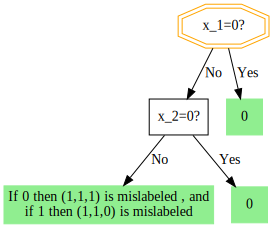

In [1]:
from graphviz import Digraph

styles = {
    'top': {'shape': 'doubleoctagon','color':'orange'},
    'yes': {'shape': 'square', 'style': 'filled', 'color': 'lightgreen'},
    'qst': {'shape': 'rect'},
    'qst2': {'shape': 'rect','style': 'filled','color': 'lightgreen'}
}

tree1 = Digraph()

tree1.node('top', "x_1=0?", styles['top'])

tree1.node('q1', "x_2=0?", styles['qst'])
tree1.node('q2', "If 0 then (1,1,1) is mislabeled , and\n if 1 then (1,1,0) is mislabeled", styles['qst2'])

tree1.node('yes1', '0', styles['yes'])
tree1.node('yes2', '0', styles['yes'])

tree1.edge('top', "yes1", "Yes")
tree1.edge('top', "q1", "No")

tree1.edge('q1', "yes2", "Yes")
tree1.edge('q1', 'q2', "No")

tree1

2. The following decision tree of depth $2$ have zero training error:

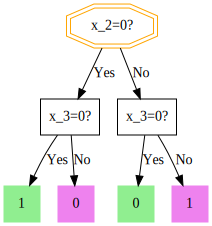

In [2]:
from graphviz import Digraph

styles = {
    'top': {'shape': 'doubleoctagon','color':'orange'},
    'yes': {'shape': 'square', 'style': 'filled', 'color': 'lightgreen'},
     'no': {'shape': 'square', 'style': 'filled', 'color': 'violet'},
    'qst': {'shape': 'rect'}
}

tree1 = Digraph()

tree1.node('top', "x_2=0?", styles['top'])

tree1.node('q1', "x_3=0?", styles['qst'])
tree1.node('q2', "x_3=0?", styles['qst'])

tree1.node('yes1', '1', styles['yes'])
tree1.node('yes2', '0', styles['yes'])

tree1.node('no1', '0', styles['no'])
tree1.node('no2', '1', styles['no'])

tree1.edge('top', "q1", "Yes")
tree1.edge('top', "q2", "No")

tree1.edge('q1', "yes1", "Yes")
tree1.edge('q1', "no1", "No")

tree1.edge('q2', "yes2", "Yes")
tree1.edge('q2', "no2", "No")

tree1

-----------------------------